<a href="https://colab.research.google.com/github/RaveEx12/InternCareer/blob/main/Titanic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


#**Data Management**

In [73]:
test_directory = '/content/test.csv'
train_directory = '/content/train (1).csv'

train_dataset = pd.read_csv(train_directory)
val_dataset = pd.read_csv(test_directory)


In [74]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##**Descriptive statistics**

In [76]:
train_dataset.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


###**PassangerID:** The feature ranges from 1-891 Indicating a Unique identifyer for each passager
###**Survived:** This feature is a binary variable(0, 1) which indiacted wheather a passager survived or Not. Here, Approximately 38% of the passagers survived while 62% did Not!
###**Pclass:** Represents the passager's class (1,2,3); we say.

*   Economy class
*   Business class

*   First class (most passangers falls in this class)

###**Sex:** (male & female) 577 passengers are male while 314 are female passangers.
###**Age:** Age range from 0.42 to 80 years; 5months old babies were included in the ship and the average age of passagers is approximately 30years of age.







In [77]:
train_dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#**Data Visualization**

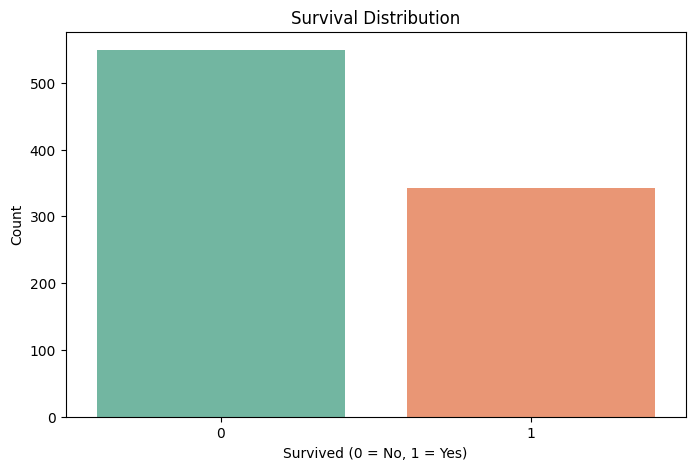

In [78]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=train_dataset, palette="Set2")
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

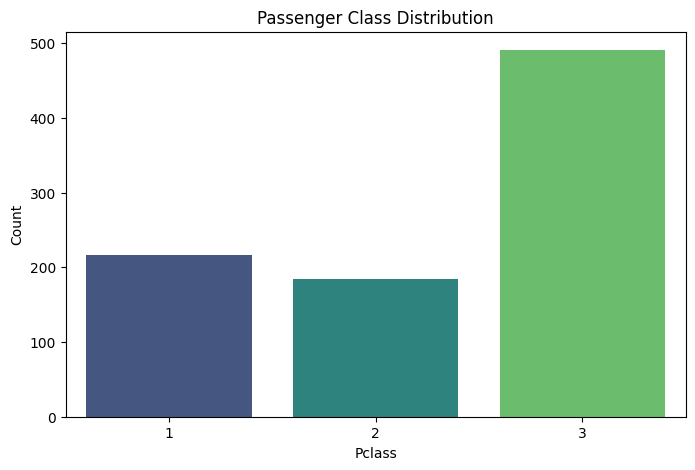

In [79]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=train_dataset, palette="viridis")
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

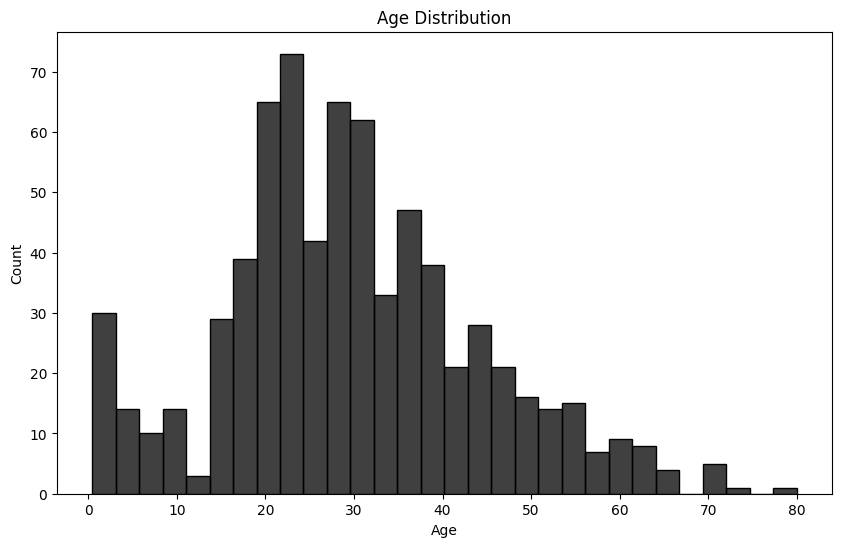

In [80]:
plt.figure(figsize=(10, 6))
sns.histplot(train_dataset['Age'].dropna(), bins=30, kde=False, color='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

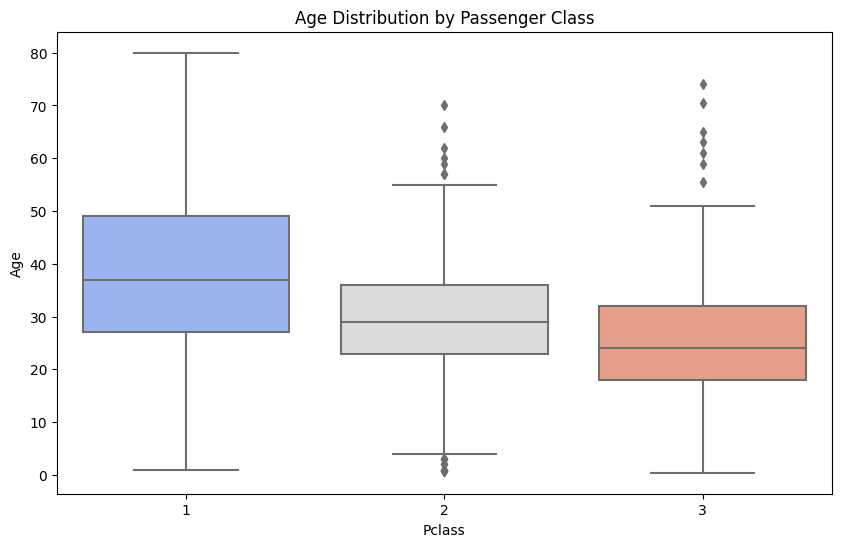

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=train_dataset, palette="coolwarm")
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

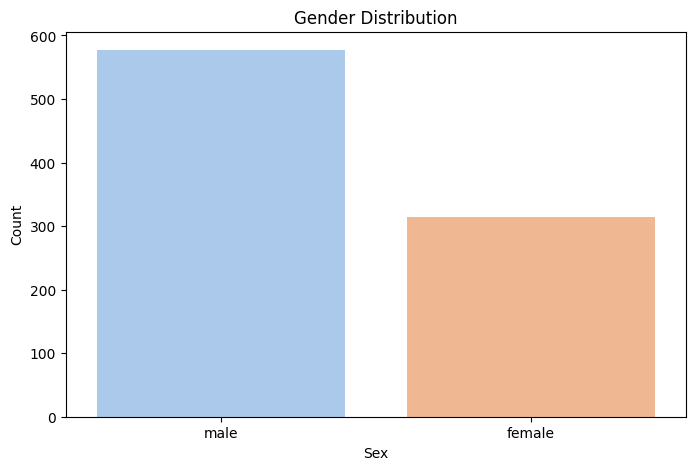

In [82]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=train_dataset, palette="pastel")
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

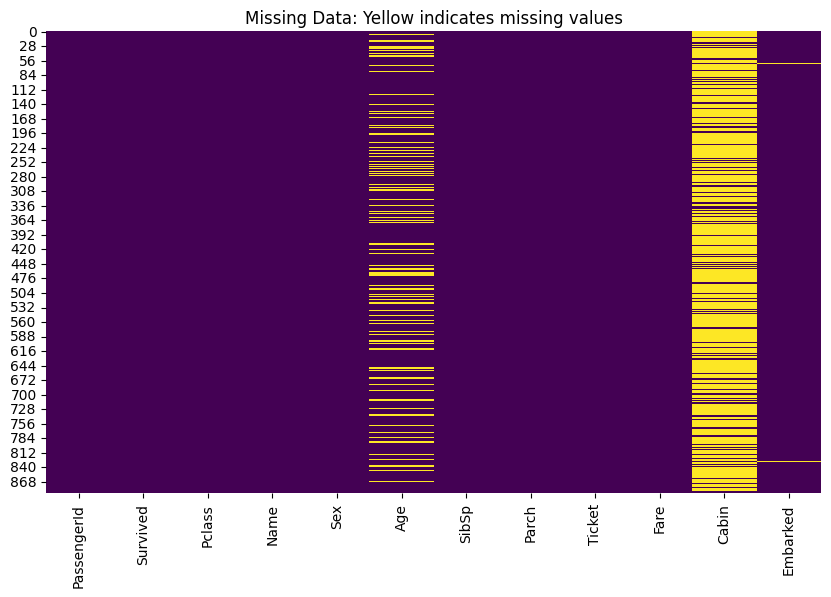

In [83]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_dataset.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data: Yellow indicates missing values')
plt.show()

#**Data Preprocessing**

##**Missing Values**

In [84]:
if 'Cabin' in train_dataset.columns:
    train_dataset = train_dataset.drop('Cabin', axis=1)

In [85]:
len(train_dataset.columns)

11

In [86]:
params = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [87]:
# imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# df_no_mv = pd.DataFrame(imp_mode.fit_transform(train_dataset))
# df_no_mv.columns=train_dataset.columns
# df_no_mv

###**Checking for Label Imbalance**

Axes(0.125,0.11;0.775x0.77)


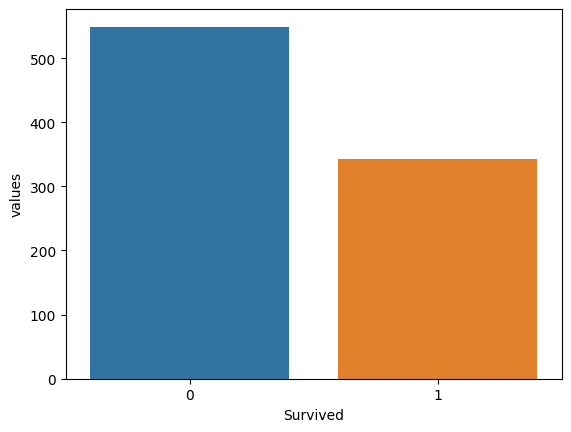

In [88]:
temp = train_dataset['Survived'].value_counts()
temp_df = pd.DataFrame({'Survived':temp.index, 'values':temp.values})
print(sns.barplot(x='Survived', y='values', data=temp_df))

In [89]:
train_dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

##**Feature Engineering**

In [92]:
train_dataset['FamilySize'] = train_dataset['SibSp'] + train_dataset['Parch']

train_dataset['IsAlone'] = (train_dataset['FamilySize'] == 1).astype(int)

Age_bracket = [0, 18, 35, 50, 100]
labels = ['child', 'youth', 'Adult', 'old']
train_dataset['AgeGroup'] = pd.cut(train_dataset['Age'], bins=Age_bracket, labels=labels)

train_dataset['IndividualFare'] = train_dataset['Fare'] / train_dataset['FamilySize']

In [93]:
train_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilySize', 'isAlone',
       'AgeGroup', 'IndividualFare', 'IsAlone'],
      dtype='object')